In [88]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd  
 #set the dataset
data= pd.read_csv('../input/anemia-dataset22/Anemia_Dataset.csv')
data

,Name,Gender,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,Shahalam,M,47.6372,26.7953,25.5675,15.1,No
1,Md.Ismail,M,45.6906,30.0735,24.2359,9.1,Yes
2,Saiful,M,NaN,31.2315,25.3586,12.9,No
3,Yamin,M,44.4252,28.7436,26.8312,14.7,No
4,Tarek,M,44.3297,28.7617,NaN,14.1,No
...,...,...,...,...,...,...,...
99,hashina,F,45.7104,27.5693,26.7204,13.6,No
100,purnima dey,F,40.9365,31.9687,27.0948,9.9,Yes
101,nur safa,F,44.9116,30.3761,24.7123,NaN,No
102,kohinur,F,NaN,29.7889,NaN,12.4,No


In [89]:
data.head(10)

,Name,Gender,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,Shahalam,M,47.6372,26.7953,25.5675,15.1,No
1,Md.Ismail,M,45.6906,30.0735,24.2359,9.1,Yes
2,Saiful,M,NaN,31.2315,25.3586,12.9,No
3,Yamin,M,44.4252,28.7436,26.8312,14.7,No
4,Tarek,M,44.3297,28.7617,NaN,14.1,No
5,Sagar,NaN,47.8913,27.0952,25.0135,14.6,No
6,Asadullah,M,NaN,30.2089,27.5438,13.7,No
7,Imran,M,44.2572,29.6578,26.0850,12.9,No
8,Kamrul,M,48.6358,26.6982,24.6660,15.0,No
9,Imram,M,42.1652,29.3907,28.4441,13.4,No


In [90]:
data.tail(10)

,Name,Gender,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
94,Shopon,M,45.0484,31.1049,23.8467,9.0,Yes
95,zidan,M,46.9942,26.0496,26.9562,14.6,No
96,shahabuddin,NaN,45.5842,28.7311,25.6848,14.0,No
97,rehena,F,42.5358,30.1604,27.3039,10.0,Yes
98,kulsuma,F,44.0957,NaN,25.9070,8.3,Yes
99,hashina,F,45.7104,27.5693,26.7204,13.6,No
100,purnima dey,F,40.9365,31.9687,27.0948,9.9,Yes
101,nur safa,F,44.9116,30.3761,24.7123,NaN,No
102,kohinur,F,NaN,29.7889,NaN,12.4,No
103,khadiza2,F,43.3019,29.8285,26.8697,12.1,No


In [91]:
data.dtypes

Name              object
Gender            object
   %Red Pixel    float64
%Green pixel     float64
%Blue pixel      float64
Hb               float64
Anaemic           object
dtype: object

In [92]:
from sklearn.preprocessing import LabelEncoder
##covert the data of sex+Gender to an int 
le = LabelEncoder()
data["anaemic_encoded"] = le.fit_transform(data['Anaemic'])
##sex_encoded==gender_encoded
data["gender_encoded"] = le.fit_transform(data['Gender'])

##show the data 
data.dtypes

Name                object
Gender              object
   %Red Pixel      float64
%Green pixel       float64
%Blue pixel        float64
Hb                 float64
Anaemic             object
anaemic_encoded      int64
gender_encoded       int64
dtype: object

In [93]:
data.columns

Index(['Name', 'Gender', '   %Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic', 'anaemic_encoded', 'gender_encoded'],
      dtype='object')

In [94]:
data.size

936

In [95]:
#  total 
data["Anaemic"].value_counts()

No     77
Yes    26
Name: Anaemic, dtype: int64

In [96]:
##the numbers of rows and columns
data.shape

(104, 9)

In [97]:
data.isnull().sum()

Name               0
Gender             8
   %Red Pixel      6
%Green pixel       3
%Blue pixel        6
Hb                 6
Anaemic            1
anaemic_encoded    0
gender_encoded     0
dtype: int64

In [98]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
%Red Pixel,98.0,45.726270,2.832300,38.7968,44.055275,45.43175,46.985575,54.6478
%Green pixel,101.0,28.868201,1.559200,25.1403,27.918100,28.92980,29.833800,32.3681
%Blue pixel,98.0,25.498766,1.932063,19.5413,24.953725,25.95320,26.684625,29.8414
Hb,98.0,12.225510,2.479122,2.8000,10.925000,12.65000,14.000000,16.3000
anaemic_encoded,104.0,0.269231,0.466983,0.0000,0.000000,0.00000,1.000000,2.0000
gender_encoded,104.0,0.615385,0.627952,0.0000,0.000000,1.00000,1.000000,2.0000


In [99]:
diabetes_data_copy1 = data.copy(deep = True)

diabetes_data_copy1[['   %Red Pixel','%Green pixel','%Blue pixel','Hb','anaemic_encoded','gender_encoded']] = diabetes_data_copy1[['   %Red Pixel','%Green pixel','%Blue pixel','Hb','anaemic_encoded','gender_encoded']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy1.isnull().sum())

Name                0
Gender              8
   %Red Pixel       6
%Green pixel        3
%Blue pixel         6
Hb                  6
Anaemic             1
anaemic_encoded    77
gender_encoded     48
dtype: int64


# Plotting before Nan removal

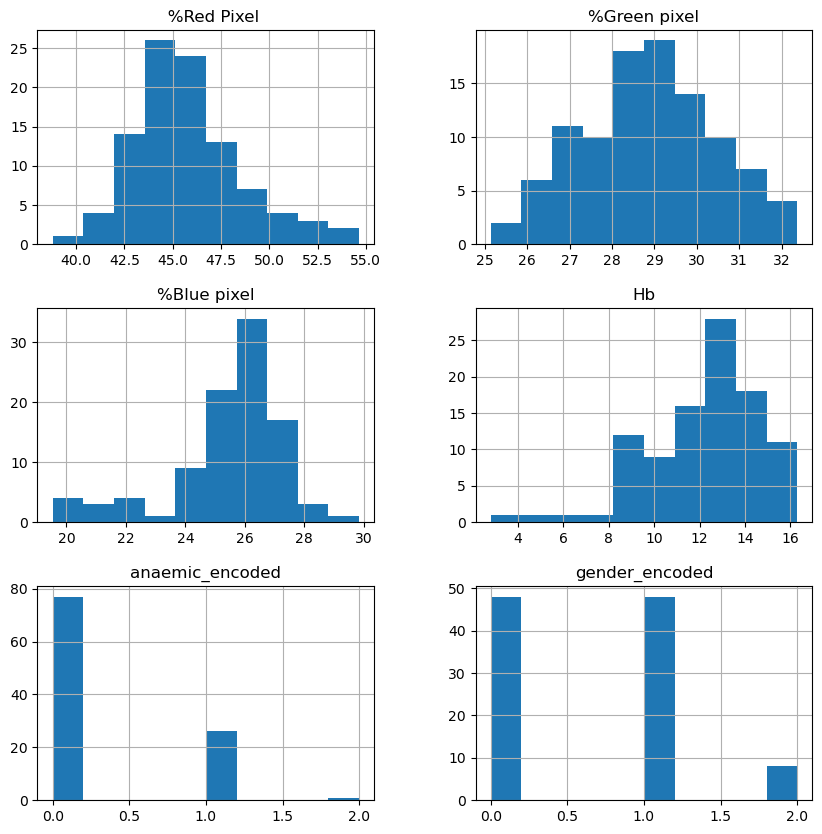

In [100]:
p = data.hist(figsize = (10,10))

In [101]:
##handle the null data or values with  
diabetes_data_copy1['   %Red Pixel'].fillna(diabetes_data_copy1['   %Red Pixel'].median (),inplace = True) 
diabetes_data_copy1['%Green pixel'].fillna(diabetes_data_copy1['%Green pixel'].median(),inplace = True) 
diabetes_data_copy1['%Blue pixel'].fillna(diabetes_data_copy1['%Blue pixel'].median(),inplace = True) 
diabetes_data_copy1['Hb'].fillna(diabetes_data_copy1['Hb'].median(),inplace = True) 
diabetes_data_copy1['anaemic_encoded'].fillna(diabetes_data_copy1['anaemic_encoded'].median(),inplace = True)
diabetes_data_copy1['gender_encoded'].fillna(diabetes_data_copy1['gender_encoded'].median(),inplace = True)

# Plotting after Nan removal

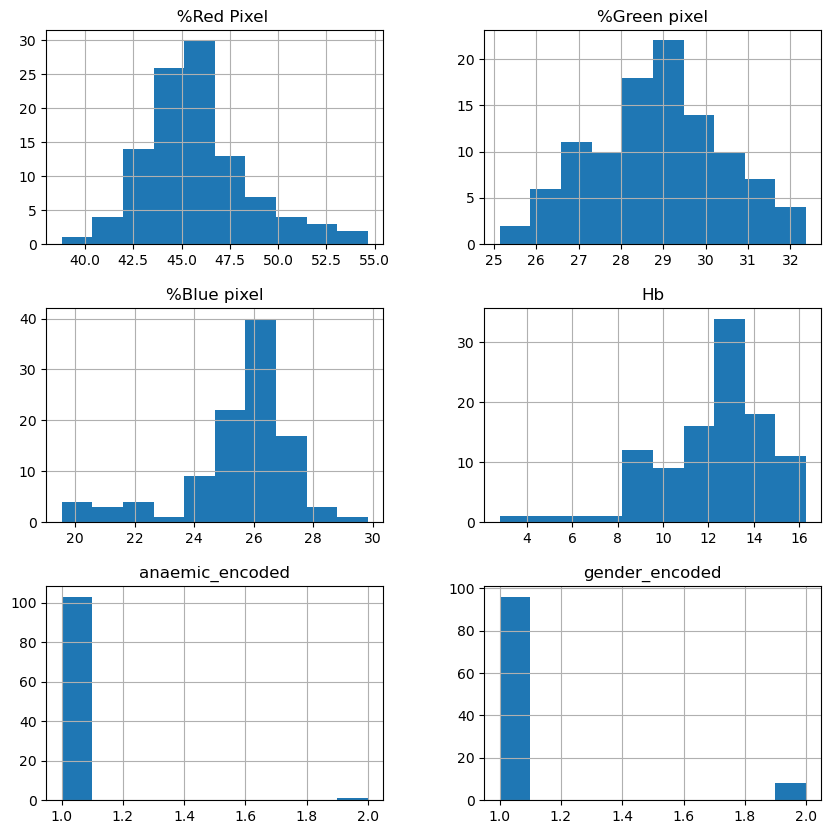

In [102]:
p = diabetes_data_copy1.hist(figsize = (10,10))

In [103]:
diabetes_data_copy1

,Name,Gender,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,anaemic_encoded,gender_encoded
0,Shahalam,M,47.63720,26.7953,25.5675,15.10,No,1.0,1.0
1,Md.Ismail,M,45.69060,30.0735,24.2359,9.10,Yes,1.0,1.0
2,Saiful,M,45.43175,31.2315,25.3586,12.90,No,1.0,1.0
3,Yamin,M,44.42520,28.7436,26.8312,14.70,No,1.0,1.0
4,Tarek,M,44.32970,28.7617,25.9532,14.10,No,1.0,1.0
...,...,...,...,...,...,...,...,...,...
99,hashina,F,45.71040,27.5693,26.7204,13.60,No,1.0,1.0
100,purnima dey,F,40.93650,31.9687,27.0948,9.90,Yes,1.0,1.0
101,nur safa,F,44.91160,30.3761,24.7123,12.65,No,1.0,1.0
102,kohinur,F,45.43175,29.7889,25.9532,12.40,No,1.0,1.0


In [104]:
diabetes_data_copy2 = data.copy(deep = True)

diabetes_data_copy2[['   %Red Pixel','%Green pixel','%Blue pixel','Hb','anaemic_encoded','gender_encoded']] = diabetes_data_copy2[['   %Red Pixel','%Green pixel','%Blue pixel','Hb','anaemic_encoded','gender_encoded']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy2.isnull().sum())

Name                0
Gender              8
   %Red Pixel       6
%Green pixel        3
%Blue pixel         6
Hb                  6
Anaemic             1
anaemic_encoded    77
gender_encoded     48
dtype: int64


In [105]:
##handle the null data or values with  
diabetes_data_copy2['   %Red Pixel'].fillna(diabetes_data_copy2['   %Red Pixel'].mean (),inplace = True) 
diabetes_data_copy2['%Green pixel'].fillna(diabetes_data_copy2['%Green pixel'].mean(),inplace = True) 
diabetes_data_copy2['%Blue pixel'].fillna(diabetes_data_copy2['%Blue pixel'].mean(),inplace = True) 
diabetes_data_copy2['Hb'].fillna(diabetes_data_copy2['Hb'].mean(),inplace = True) 
diabetes_data_copy2['anaemic_encoded'].fillna(diabetes_data_copy2['anaemic_encoded'].mean(),inplace = True)
diabetes_data_copy2['gender_encoded'].fillna(diabetes_data_copy2['gender_encoded'].mean(),inplace = True)

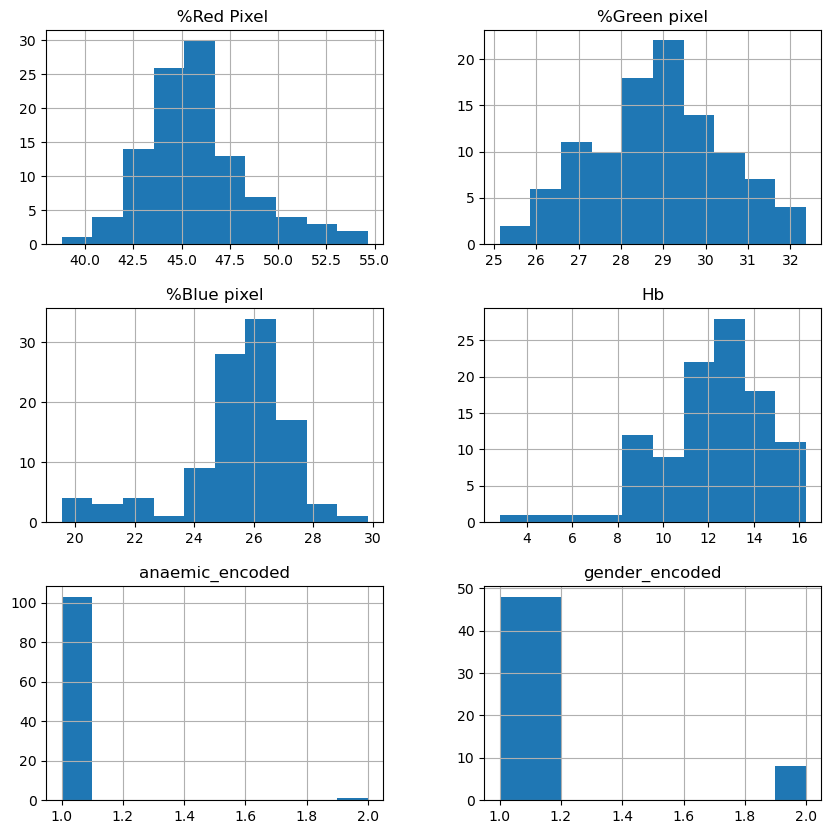

In [106]:
p = diabetes_data_copy2.hist(figsize = (10,10))

In [107]:
diabetes_data_copy2

,Name,Gender,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,anaemic_encoded,gender_encoded
0,Shahalam,M,47.63720,26.7953,25.567500,15.10000,No,1.037037,1.000000
1,Md.Ismail,M,45.69060,30.0735,24.235900,9.10000,Yes,1.000000,1.000000
2,Saiful,M,45.72627,31.2315,25.358600,12.90000,No,1.037037,1.000000
3,Yamin,M,44.42520,28.7436,26.831200,14.70000,No,1.037037,1.000000
4,Tarek,M,44.32970,28.7617,25.498766,14.10000,No,1.037037,1.000000
...,...,...,...,...,...,...,...,...,...
99,hashina,F,45.71040,27.5693,26.720400,13.60000,No,1.037037,1.142857
100,purnima dey,F,40.93650,31.9687,27.094800,9.90000,Yes,1.000000,1.142857
101,nur safa,F,44.91160,30.3761,24.712300,12.22551,No,1.037037,1.142857
102,kohinur,F,45.72627,29.7889,25.498766,12.40000,No,1.037037,1.142857


In [108]:
diabetes_data_copy3 = data.copy(deep = True)

diabetes_data_copy3[['   %Red Pixel','%Green pixel','%Blue pixel','Hb','anaemic_encoded','gender_encoded']] = diabetes_data_copy3[['   %Red Pixel','%Green pixel','%Blue pixel','Hb','anaemic_encoded','gender_encoded']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy3.isnull().sum())

Name                0
Gender              8
   %Red Pixel       6
%Green pixel        3
%Blue pixel         6
Hb                  6
Anaemic             1
anaemic_encoded    77
gender_encoded     48
dtype: int64


In [109]:
##handle the null data or values with  
diabetes_data_copy3['   %Red Pixel'].fillna(diabetes_data_copy3['   %Red Pixel'].mode (),inplace = True) 
diabetes_data_copy3['%Green pixel'].fillna(diabetes_data_copy3['%Green pixel'].mode(),inplace = True) 
diabetes_data_copy3['%Blue pixel'].fillna(diabetes_data_copy3['%Blue pixel'].mode(),inplace = True) 
diabetes_data_copy3['Hb'].fillna(diabetes_data_copy3['Hb'].mode(),inplace = True) 
diabetes_data_copy3['anaemic_encoded'].fillna(diabetes_data_copy3['anaemic_encoded'].mode(),inplace = True)
diabetes_data_copy3['gender_encoded'].fillna(diabetes_data_copy3['gender_encoded'].mode(),inplace = True)

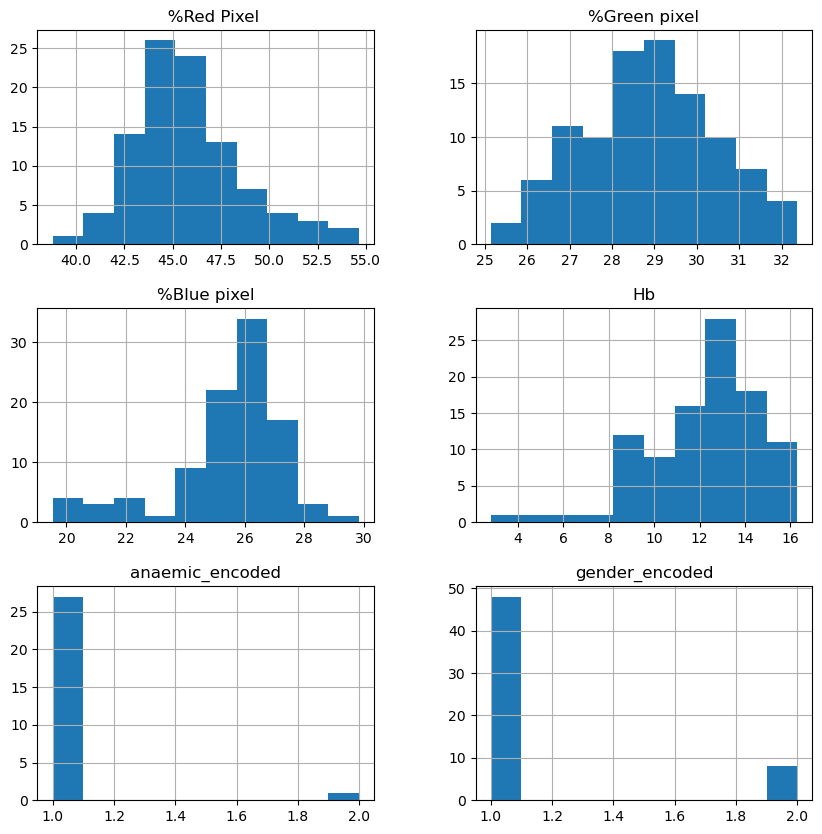

In [110]:
p = diabetes_data_copy3.hist(figsize = (10,10))

In [133]:
diabetes_data_copy3

,Name,Gender,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,anaemic_encoded,gender_encoded
0,Shahalam,M,47.6372,26.7953,25.5675,15.1,No,1.0,1.0
1,Md.Ismail,M,45.6906,30.0735,24.2359,9.1,Yes,1.0,1.0
2,Saiful,M,NaN,31.2315,25.3586,12.9,No,NaN,1.0
3,Yamin,M,44.4252,28.7436,26.8312,14.7,No,NaN,1.0
4,Tarek,M,44.3297,28.7617,NaN,14.1,No,NaN,1.0
...,...,...,...,...,...,...,...,...,...
99,hashina,F,45.7104,27.5693,26.7204,13.6,No,NaN,NaN
100,purnima dey,F,40.9365,31.9687,27.0948,9.9,Yes,1.0,NaN
101,nur safa,F,44.9116,30.3761,24.7123,NaN,No,NaN,NaN
102,kohinur,F,NaN,29.7889,NaN,12.4,No,NaN,NaN


In [111]:
##Splitting the data into test and train sets
from sklearn.model_selection import train_test_split #training and testing data split


X=data[[ 'gender_encoded','   %Red Pixel','%Green pixel', '%Blue pixel', 'Hb']]
y=data["anaemic_encoded"]

train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=0)

train_X,val_X,train_Y,val_Y=train_test_split(train_X,train_Y,test_size=0.3,random_state=0)

len(train_X), len(train_Y), len(test_X), len(test_Y)

(50, 50, 32, 32)

In [112]:
data

,Name,Gender,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,anaemic_encoded,gender_encoded
0,Shahalam,M,47.6372,26.7953,25.5675,15.1,No,0,1
1,Md.Ismail,M,45.6906,30.0735,24.2359,9.1,Yes,1,1
2,Saiful,M,NaN,31.2315,25.3586,12.9,No,0,1
3,Yamin,M,44.4252,28.7436,26.8312,14.7,No,0,1
4,Tarek,M,44.3297,28.7617,NaN,14.1,No,0,1
...,...,...,...,...,...,...,...,...,...
99,hashina,F,45.7104,27.5693,26.7204,13.6,No,0,0
100,purnima dey,F,40.9365,31.9687,27.0948,9.9,Yes,1,0
101,nur safa,F,44.9116,30.3761,24.7123,NaN,No,0,0
102,kohinur,F,NaN,29.7889,NaN,12.4,No,0,0


In [113]:
## .fillna(0) : to replace the NaN with 0 becuse without ths methos the dessition tree and KNN will not work 
train_X.fillna(0)

,gender_encoded,%Red Pixel,%Green pixel,%Blue pixel,Hb
53,0,49.5899,28.9754,21.4347,0.0
73,0,51.5802,28.2678,20.1520,13.2
76,1,49.9999,29.2860,20.7141,14.5
27,1,45.9659,28.4015,25.6326,13.0
46,0,46.9597,28.4993,24.5410,8.4
102,0,0.0000,29.7889,0.0000,12.4
1,1,45.6906,30.0735,24.2359,9.1
19,1,46.7628,28.0180,25.2192,15.2
72,1,52.1540,26.0853,21.7607,16.0
81,2,43.2555,30.8421,25.9025,0.0


In [114]:
train_Y.fillna(0)

53     1
73     0
76     1
27     0
46     1
102    0
1      1
19     0
72     0
81     1
58     0
31     0
4      0
64     0
5      0
23     0
37     0
80     0
38     1
90     1
15     0
59     1
17     0
95     0
9      0
93     1
41     1
55     1
32     0
40     1
88     0
69     0
36     0
14     0
94     1
71     1
12     0
42     0
70     0
28     0
89     0
34     0
91     0
54     1
103    0
67     0
100    1
21     0
20     0
101    0
Name: anaemic_encoded, dtype: int64

# DecisionTree

In [115]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree
dt=DecisionTreeClassifier()

train_YY=train_Y.fillna(0)
train_XX=train_X.fillna(0)
test_XX=test_X.fillna(0)
test_YY=test_Y.fillna(0)

dt=dt.fit(train_XX,train_YY)

# Check accuracy score for DecisionTree

In [116]:
from sklearn.metrics import accuracy_score
#accuracy
# Predicting results using testing  data set


pred = dt.predict(test_XX)
print('Model DT accuracy score: {0:0.4f}'. format(accuracy_score(pred,test_YY)))


Model DT accuracy score: 0.8438


In [117]:
#accuracy
# Predicting results using training data set
pred = dt.predict(train_XX)
print('Training-set DT accuracy score: {0:0.1f}'. format(accuracy_score(pred,train_YY)))

##The training-set accuracy score is 0.1.00 while the test-set accuracy to be 0.8438.
##These two values are quite comparable. So, there is sign of overfitting.

Training-set DT accuracy score: 1.0


Text(0.5, 19.049999999999997, 'Predicted label')

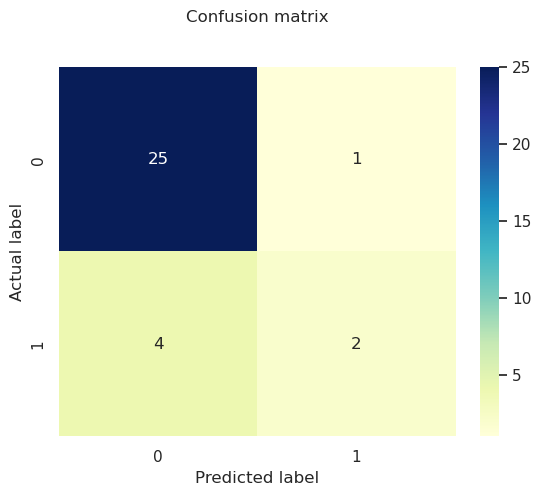

In [118]:
# confusion_matrix
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("\n")
y_pred = dt.predict(test_XX)

cnf_matrix = metrics.confusion_matrix(test_YY, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
def model_evaluation(test_YY, y_pred, model_name):
    acc = accuracy_score(test_YY, y_pred)
    prec = precision_score(test_YY, y_pred)
    rec = recall_score(test_YY, y_pred)
    f1 = f1_score(test_YY, y_pred)
    f2 = fbeta_score(test_YY, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

print("\n")

model_evaluation(test_YY, y_pred, "DecisionTree")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,DecisionTree,0.84375,0.666667,0.333333,0.444444,0.37037


In [120]:
 from sklearn.metrics import classification_report
val_accuracy = accuracy_score(test_YY, y_pred)
print("\n")
print(f'Accuracy Validation for the Decision Tree is: {val_accuracy}')
print("\n")
target_names = ['no 0', 'yes 1']
print(classification_report(test_YY, y_pred, target_names=target_names))
print("\n")



Accuracy Validation for the Decision Tree is: 0.84375


              precision    recall  f1-score   support

        no 0       0.86      0.96      0.91        26
       yes 1       0.67      0.33      0.44         6

    accuracy                           0.84        32
   macro avg       0.76      0.65      0.68        32
weighted avg       0.83      0.84      0.82        32





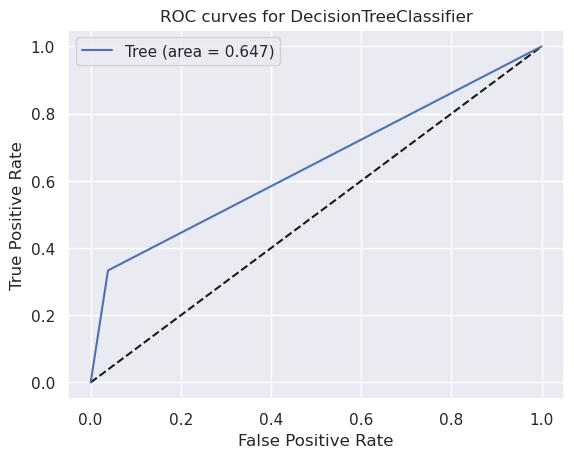

In [121]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve

# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(train_XX,train_YY)
y_pred_prob_Tree = modelTree.predict_proba(test_XX)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_YY, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_YY, y_pred_prob_Tree)

print("\n")

plt.plot([0, 1], [0, 1], 'k--')
 
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for DecisionTreeClassifier')
plt.legend(loc='best')
plt.show()
print("\n")

# # KNN

In [122]:
##KNN
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier() 


train_Y=train_Y.fillna(0)
train_X=train_X.fillna(0)
test_X=test_X.fillna(0)
test_Y=test_Y.fillna(0)


knn.fit(train_X,train_Y)
 
 

KNeighborsClassifier()

# Check accuracy score for KNN

In [123]:
y_pred = knn.predict(test_X)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(test_Y, y_pred)))

Model accuracy score: 0.9688


In [124]:
y_pred_train = knn.predict(train_X)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_Y, y_pred_train)))

##The training-set accuracy score is 0.9375 while the test-set accuracy to be 0.9000.
##These two values are quite comparable. So, there is no question of overfitting.

Training-set accuracy score: 0.9200


# Predicting results using training data set with accuracy

In [125]:
##accuracy
# Predicting results using training data set
pred = knn.predict(train_X)
accuracy_score(pred,train_Y)

0.92

In [126]:
 
# Running KNN for various values of n_neighbors and storing results
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(train_X,train_Y)
    
    test_score = knn.score(test_X, test_Y)
    train_score = knn.score(train_X, train_Y)
    
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc , columns=['K','Accuracy Test Score','Accuracy Train Score'])
print("\n")
print(df)
print("\n")



     K  Accuracy Test Score  Accuracy Train Score
0    1              0.93750                  1.00
1    2              0.93750                  0.90
2    3              0.84375                  0.92
3    4              0.93750                  0.92
4    5              0.96875                  0.92
5    6              0.96875                  0.92
6    7              0.84375                  0.92
7    8              0.96875                  0.88
8    9              0.84375                  0.90
9   10              0.90625                  0.90
10  11              0.84375                  0.92
11  12              0.93750                  0.84
12  13              0.93750                  0.86
13  14              0.90625                  0.84
14  15              0.90625                  0.86
15  16              0.87500                  0.84




In [127]:
 #chose the k then do compare based on accurisy 
    ##1
knn_5 = KNeighborsClassifier(n_neighbors=1)

knn_5.fit(train_X,train_Y)

# predict on the test-set
y_pred_5 = knn_5.predict(test_X)

print('Model accuracy score with k=1: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")

##2
knn_5 = KNeighborsClassifier(n_neighbors=2)
print('Model accuracy score with k=2: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")

knn_5 = KNeighborsClassifier(n_neighbors=3)
print('Model accuracy score with k=3: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")

knn_5 = KNeighborsClassifier(n_neighbors=4)
print('Model accuracy score with k=4: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")

knn_5 = KNeighborsClassifier(n_neighbors=5)
print('Model accuracy score with k=5: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")


knn_5 = KNeighborsClassifier(n_neighbors=6)
print('Model accuracy score with k=6: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")


knn_5 = KNeighborsClassifier(n_neighbors=7)
print('Model accuracy score with k=7: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")



knn_5 = KNeighborsClassifier(n_neighbors=8)
print('Model accuracy score with k=8: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")


knn_5 = KNeighborsClassifier(n_neighbors=9)
print('Model accuracy score with k=9: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")


knn_5 = KNeighborsClassifier(n_neighbors=10)
print('Model accuracy score with k=10: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")

knn_5 = KNeighborsClassifier(n_neighbors=11)
print('Model accuracy score with k=11: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")

knn_5 = KNeighborsClassifier(n_neighbors=12)
print('Model accuracy score with k=12: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")


knn_5 = KNeighborsClassifier(n_neighbors=13)
print('Model accuracy score with k=13: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")


knn_5 = KNeighborsClassifier(n_neighbors=14)
print('Model accuracy score with k=14: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")


knn_5 = KNeighborsClassifier(n_neighbors=15)
print('Model accuracy score with k=15: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")


knn_5 = KNeighborsClassifier(n_neighbors=16)
print('Model accuracy score with k=16: {0:0.5f}'. format(accuracy_score(test_Y, y_pred_5)))
print("\n")



Model accuracy score with k=1: 0.93750


Model accuracy score with k=2: 0.93750


Model accuracy score with k=3: 0.93750


Model accuracy score with k=4: 0.93750


Model accuracy score with k=5: 0.93750


Model accuracy score with k=6: 0.93750


Model accuracy score with k=7: 0.93750


Model accuracy score with k=8: 0.93750


Model accuracy score with k=9: 0.93750


Model accuracy score with k=10: 0.93750


Model accuracy score with k=11: 0.93750


Model accuracy score with k=12: 0.93750


Model accuracy score with k=13: 0.93750


Model accuracy score with k=14: 0.93750


Model accuracy score with k=15: 0.93750


Model accuracy score with k=16: 0.93750




all of then show same accurisy so average of k is  k=8

Text(0.5, 19.049999999999997, 'Predicted label')

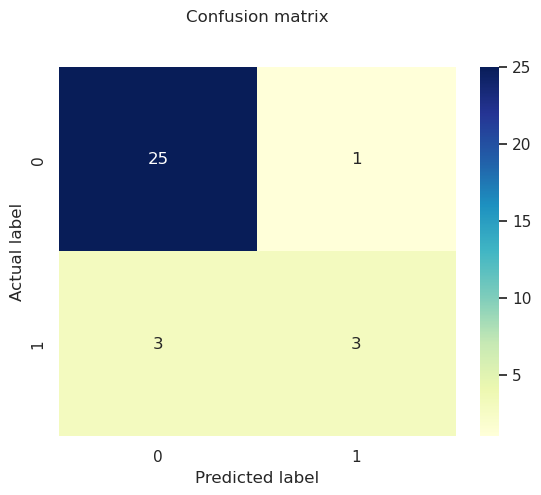

In [128]:
#  confusion_matrix
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print("\n")
y_pred = knn.predict(test_X)
cnf_matrix = metrics.confusion_matrix(test_Y, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
def model_evaluation(test_Y, y_pred, model_name):
    acc = accuracy_score(test_Y, y_pred)
    prec = precision_score(test_Y, y_pred)
    rec = recall_score(test_Y, y_pred)
    f1 = f1_score(test_Y, y_pred)
    f2 = fbeta_score(test_Y, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results


print("\n")
model_evaluation(test_Y, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.875,0.75,0.5,0.6,0.535714


In [130]:
 
from sklearn.metrics import classification_report
val_accuracy = accuracy_score(test_Y, y_pred)
print("\n")
print(f'Accuracy Validation for the KNN is: {val_accuracy}')
print("\n")
target_names = ['no 0', 'yes 1']
print(classification_report(test_Y, y_pred, target_names=target_names))



Accuracy Validation for the KNN is: 0.875


              precision    recall  f1-score   support

        no 0       0.89      0.96      0.93        26
       yes 1       0.75      0.50      0.60         6

    accuracy                           0.88        32
   macro avg       0.82      0.73      0.76        32
weighted avg       0.87      0.88      0.86        32



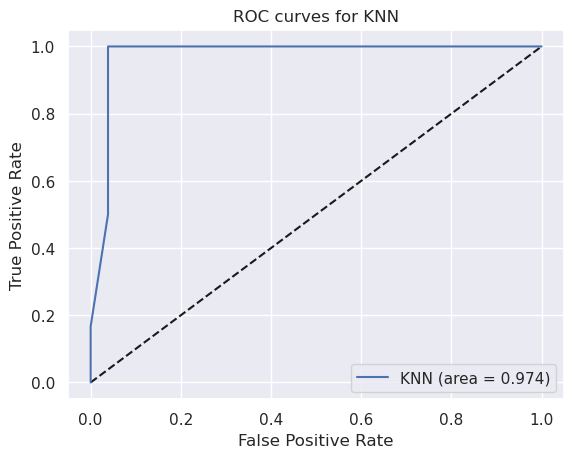

In [131]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve

# Decision Tree
modelKNN = KNeighborsClassifier(n_neighbors=8)
modelKNN.fit(train_X,train_Y)

y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)

print("\n")
plt.plot([0, 1], [0, 1], 'k--')
 
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for KNN')
plt.legend(loc='best')
plt.show()
